# CUSTOMER SEGMENTATION WITH K-MEANS CLUSTERING
A primary goal for any company and business is to understand their targeted customers, how their consumers operate and use their services. In this project we use an e-commerce dataset to try and group customers with similar behaviours. I tried to use the RFM matrix principle to determine what features to be used for this dataset.<br>

The RFM matrix principle uses Recency(F), Frequency(F) and Monetary Value(M) to divide customers into groups. Therefore in this project, the following features will be used;

   1.Total Expenditure (Monetary value)<br>
   2.Total Products purchased (Frequency)<br>
   3.Recency of the customer (Recency)<br>

Dataset represents real customers & orders data between November 2018 - April 2019.

The following describes some of the columns in the dataset;
  - net_quantity - The final number of products purchased after returns<br>
  - gross_sales - Initial total sales before discounts and taxes<br>
  - discount - discount applied to an order<br>
  - taxes - taxes applied to an order<br>
  - net_sales - total sales of an order after appying discount but before taxes<br>
  - total_sales - final total sales of an order after  discounts and taxes<br>
  - returned_item - number of items returned<br>
  - orderd_item_quantity - Initial number of items purchased<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

In [2]:
#load data into dataset
customers_orders=pd.read_csv("Customers_Orders.csv")

In [3]:
customers_orders.head()


,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,1312378,83290718932496,04/12/2018,2,200.0,-200.00,0.00,0.0,0.0,0.0,0,2
1,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686,3715657,36253792848113,01/04/2019,2,190.0,-190.00,0.00,0.0,0.0,0.0,0,2
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,9533448,73094559597229,05/11/2018,0,164.8,-156.56,-8.24,0.0,0.0,0.0,-2,2
3,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,53616575668264,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1
4,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,29263220319421,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1


In [4]:
#general information of the data
customers_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70052 entries, 0 to 70051
Data columns (total 17 columns):
product_title             70052 non-null object
product_type              70052 non-null object
variant_title             70052 non-null object
variant_sku               70052 non-null object
variant_id                70052 non-null int64
customer_id               70052 non-null int64
order_id                  70052 non-null int64
day                       70052 non-null object
net_quantity              70052 non-null int64
gross_sales               70052 non-null float64
discounts                 70052 non-null float64
returns                   70052 non-null float64
net_sales                 70052 non-null float64
taxes                     70052 non-null float64
total_sales               70052 non-null float64
returned_item_quantity    70052 non-null int64
ordered_item_quantity     70052 non-null int64
dtypes: float64(6), int64(6), object(5)
memory usage: 9.1+ MB


In [5]:
#get descriptions of the data
customers_orders.describe()

,variant_id,customer_id,order_id,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
count,7.005200e+04,7.005200e+04,7.005200e+04,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000
mean,2.442320e+11,6.013091e+11,5.506075e+13,0.701179,61.776302,-4.949904,-10.246051,46.580348,9.123636,55.703982,-0.156098,0.857277
std,4.255079e+12,6.223201e+12,2.587640e+13,0.739497,31.800689,7.769972,25.154677,51.802690,10.305236,61.920557,0.369190,0.380820
min,1.001447e+07,1.000661e+06,1.000657e+13,-3.000000,0.000000,-200.000000,-237.500000,-237.500000,-47.500000,-285.000000,-3.000000,0.000000
25%,2.692223e+07,3.295695e+06,3.270317e+13,1.000000,51.670000,-8.340000,0.000000,47.080000,8.375000,56.227500,0.000000,1.000000
50%,4.494514e+07,5.566107e+06,5.522207e+13,1.000000,74.170000,0.000000,0.000000,63.330000,12.660000,76.000000,0.000000,1.000000
75%,7.743106e+07,7.815352e+06,7.736876e+13,1.000000,79.170000,0.000000,0.000000,74.170000,14.840000,89.000000,0.000000,1.000000
max,8.422212e+13,9.977409e+13,9.999554e+13,6.000000,445.000000,0.000000,0.000000,445.000000,63.340000,445.000000,0.000000,6.000000


# #Data Preprocessing

There were significant amount of entries whose net quantity is less than zero and ordered item quantity is zero, this means that there were returns when in real sense no items were purchased. Therefore we will drop rows with net quantity less than zero as it does not make sense to have returns when no item was previously purchased.

In [6]:
customers_orders = customers_orders.drop(customers_orders[customers_orders.net_quantity < 0].index)
customers_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59337 entries, 0 to 59341
Data columns (total 17 columns):
product_title             59337 non-null object
product_type              59337 non-null object
variant_title             59337 non-null object
variant_sku               59337 non-null object
variant_id                59337 non-null int64
customer_id               59337 non-null int64
order_id                  59337 non-null int64
day                       59337 non-null object
net_quantity              59337 non-null int64
gross_sales               59337 non-null float64
discounts                 59337 non-null float64
returns                   59337 non-null float64
net_sales                 59337 non-null float64
taxes                     59337 non-null float64
total_sales               59337 non-null float64
returned_item_quantity    59337 non-null int64
ordered_item_quantity     59337 non-null int64
dtypes: float64(6), int64(6), object(5)
memory usage: 8.1+ MB


In [7]:
#looking for any missing values
print(customers_orders.isnull().any())

product_title             False
product_type              False
variant_title             False
variant_sku               False
variant_id                False
customer_id               False
order_id                  False
day                       False
net_quantity              False
gross_sales               False
discounts                 False
returns                   False
net_sales                 False
taxes                     False
total_sales               False
returned_item_quantity    False
ordered_item_quantity     False
dtype: bool


### Total Spending
It is the agreaggated sum of money spent by each customer

In [8]:
#group customers by their total expenditure
Total_spent=customers_orders.groupby(['customer_id'])['total_sales'].sum()

In [9]:
Total_spent.describe()

count    24874.000000
mean       191.245288
std        171.100082
min          0.000000
25%         89.000000
50%        142.400000
75%        237.000000
max       3131.700000
Name: total_sales, dtype: float64

### Total Products Ordered
This is the aggreaggated sum of products ordered per customer

In [10]:
#group customers by total products ordered
products_ordered=customers_orders.groupby(['customer_id'])['ordered_item_quantity'].sum()

In [11]:
products_ordered

customer_id
1000661           3
1001914           1
1002167           3
1002387           1
1002419           2
                 ..
97805007741979    5
98854671633650    3
98974226154136    1
99262726332691    3
99549917598660    1
Name: ordered_item_quantity, Length: 24874, dtype: int64

In [12]:
#merge together Total_spent and products_ordered groupbys
customers=pd.merge(Total_spent, products_ordered, on='customer_id')
customers

,total_sales,ordered_item_quantity
customer_id,,
1000661,260.0,3
1001914,79.2,1
1002167,234.2,3
1002387,89.0,1
1002419,103.0,2
...,...,...
97805007741979,259.0,5
98854671633650,242.5,3
98974226154136,89.0,1


### Customer Recency
This is the number of days since last purchase by a customer

In [13]:
#converting day column to datetime datatype
customers_orders['day'] = pd.to_datetime(customers_orders['day'])
customers_orders

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,1312378,83290718932496,2018-04-12,2,200.00,-200.00,0.00,0.0,0.0,0.0,0,2
1,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686,3715657,36253792848113,2019-01-04,2,190.00,-190.00,0.00,0.0,0.0,0.0,0,2
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,9533448,73094559597229,2018-05-11,0,164.80,-156.56,-8.24,0.0,0.0,0.0,-2,2
3,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,53616575668264,2019-02-19,1,119.00,-119.00,0.00,0.0,0.0,0.0,0,1
4,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,29263220319421,2019-02-19,1,119.00,-119.00,0.00,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59337,ZQV,Product W,30 / B / FtO,DB-F64-786-53D-E-2AA01BE,44945143,8064801,62354909703252,2019-09-01,0,57.50,0.00,-57.50,0.0,0.0,0.0,-1,1
59338,FTU,Product N,XL / Sl / Re,D7-8AB-C32-494-A-CF1BD1B,54388513,2953344,41328715058313,2019-10-02,0,49.17,0.00,-49.17,0.0,0.0,0.0,-1,1
59339,FTU,Product N,L / Sl / Re,22-81B-50C-90D-3-6818F85,54388513,6347235,94824655653983,2019-01-14,0,59.00,0.00,-59.00,0.0,0.0,0.0,-1,1
59340,QID,Product H,32 / A / FtO,04-C33-7C3-878-A-F7EC808,17627416,8165442,14619721496901,2019-03-22,0,74.17,0.00,-74.17,0.0,0.0,0.0,-1,1


In [14]:
#finding out the last purchase date in the data
customers_orders['day'].max()

Timestamp('2019-12-04 00:00:00')

In [15]:
#finding out the first purchase date in the data
customers_orders['day'].min()

Timestamp('2018-01-11 00:00:00')

In [16]:
#qrouping customers by their most recent purchase
customer_recency = customers_orders.groupby('customer_id').agg({'day': lambda x: x.max()})
customer_recency

,day
customer_id,
1000661,2018-11-23
1001914,2018-11-23
1002167,2019-08-03
1002387,2019-03-17
1002419,2019-06-01
...,...
97805007741979,2019-03-22
98854671633650,2019-03-29
98974226154136,2019-01-04


In [17]:
#since the last purchase date is 2019-12-04, we will use it as the current date to calculate recency.
import datetime as dt
NOW = dt.datetime(2019, 12, 4)

customer_recency['recency'] = NOW - customer_recency['day']
customer_recency

,day,recency
customer_id,,
1000661,2018-11-23,376 days
1001914,2018-11-23,376 days
1002167,2019-08-03,123 days
1002387,2019-03-17,262 days
1002419,2019-06-01,186 days
...,...,...
97805007741979,2019-03-22,257 days
98854671633650,2019-03-29,250 days
98974226154136,2019-01-04,334 days


In [18]:
#drop day column 
customer_recency = customer_recency.drop(columns=['day'])

In [19]:
customer_recency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24874 entries, 1000661 to 99549917598660
Data columns (total 1 columns):
recency    24874 non-null timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 388.7 KB


The datatype for recency is timedelta and since its easier to work with numeric values, we will change datatype to float.

In [20]:
#changing the datatype of recency columnnfrom timedelta to float
customer_recency['recency'] = customer_recency['recency'] / np.timedelta64(1, "D")
customer_recency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24874 entries, 1000661 to 99549917598660
Data columns (total 1 columns):
recency    24874 non-null float64
dtypes: float64(1)
memory usage: 388.7 KB


In [21]:
#now we merge customer_recency qroupby to the earlier customers dataset
customers=customers.merge(customer_recency, on='customer_id', how='outer')

In [22]:
customers

,total_sales,ordered_item_quantity,recency
customer_id,,,
1000661,260.0,3,376.0
1001914,79.2,1,376.0
1002167,234.2,3,123.0
1002387,89.0,1,262.0
1002419,103.0,2,186.0
...,...,...,...
97805007741979,259.0,5,257.0
98854671633650,242.5,3,250.0
98974226154136,89.0,1,334.0


## Visualization 

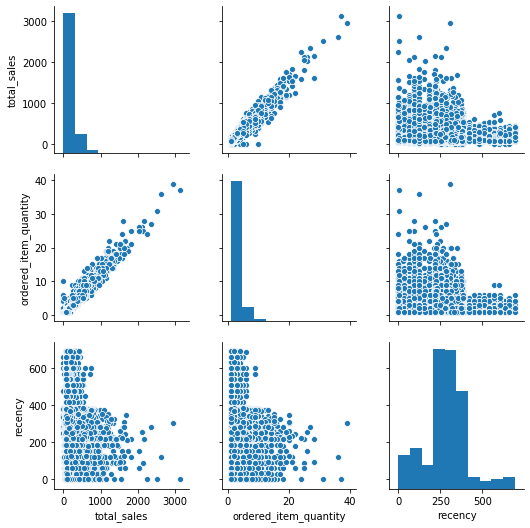

In [29]:
#looking for outliers
sns.pairplot(customers)

Text(0.5, 1.0, 'Customer Recency')

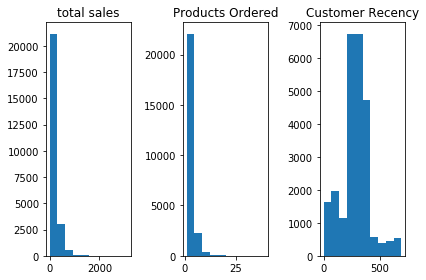

In [23]:
#Visualize features and look at their distributions
fig, axs =  plt.subplots(1,3, tight_layout=True)
axs[0].hist(x=customers.total_sales)
axs[0].set_title('total sales')
axs[1].hist(x=customers.ordered_item_quantity)
axs[1].set_title('Products Ordered')
axs[2].hist(x=customers.recency)
axs[2].set_title('Customer Recency')

From the plots, it is clear that the recency variable follows a normal distribution but both total_sales and ordered_item_quantity have a skewed distribution. We shall try to normalize them by applying log.

### Log Transformations

In [24]:
#since total_sales had some rows with zero values and we cannot apply log to a zero, we will use 'where' parameter to exclude zeros from being applied to log 
def log_transformer(dataframe, column):
    dataframe["log_" + column] = np.log(dataframe[column], where=(dataframe[column]!=0), out=np.zeros_like(dataframe[column]))
    return dataframe["log_" + column]

In [25]:
log_transformer(customers, 'total_sales')

customer_id
1000661           5.560682
1001914           4.371976
1002167           5.456175
1002387           4.488636
1002419           4.634729
                    ...   
97805007741979    5.556828
98854671633650    5.491002
98974226154136    4.488636
99262726332691    5.587249
99549917598660    4.158883
Name: log_total_sales, Length: 24874, dtype: float64

In [26]:
def log_transformer_product(dataframe, column):
    dataframe["log_" + column] = np.log(dataframe[column])
    return dataframe["log_" + column]

In [27]:
log_transformer_product(customers, 'ordered_item_quantity')

customer_id
1000661           1.098612
1001914           0.000000
1002167           1.098612
1002387           0.000000
1002419           0.693147
                    ...   
97805007741979    1.609438
98854671633650    1.098612
98974226154136    0.000000
99262726332691    1.098612
99549917598660    0.000000
Name: log_ordered_item_quantity, Length: 24874, dtype: float64

In [28]:
customers

,total_sales,ordered_item_quantity,recency,log_total_sales,log_ordered_item_quantity
customer_id,,,,,
1000661,260.0,3,376.0,5.560682,1.098612
1001914,79.2,1,376.0,4.371976,0.000000
1002167,234.2,3,123.0,5.456175,1.098612
1002387,89.0,1,262.0,4.488636,0.000000
1002419,103.0,2,186.0,4.634729,0.693147
...,...,...,...,...,...
97805007741979,259.0,5,257.0,5.556828,1.609438
98854671633650,242.5,3,250.0,5.491002,1.098612
98974226154136,89.0,1,334.0,4.488636,0.000000


Text(0.5, 1.0, 'Recency')

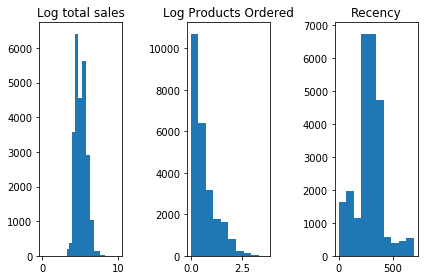

In [29]:
#visualize log transformed variables
fig, axs =  plt.subplots(1,3, tight_layout=True)
axs[0].hist(x=customers.log_total_sales, bins=np.logspace(np.log10(0.1), np.log10(10)))
axs[0].set_title('Log total sales')
axs[1].hist(x=customers.log_ordered_item_quantity)
axs[1].set_title('Log Products Ordered')
axs[2].hist(x=customers.recency)
axs[2].set_title('Recency')

## Modelling
Now we start building our clustering model using K-mean algorithm. The most important parameter for K-mean algorithm is the number of clusters(k). In this project, the Elbow method was used to determine how many clusters we have in our data.

In [30]:
#load features into an array
X= customers[['log_total_sales', 'log_ordered_item_quantity', 'recency']]


In [31]:
distortion_values = list()
inertia_values = list()
K = range(1,10)
for k in K:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    distortions = sum(np.min(cdist(X, kmeans_model.cluster_centers_, 'euclidean'), axis=1))/X.shape[0]
    distortion_values.append(distortions)
    inertia = kmeans_model.inertia_
    inertia_values.append(inertia)

<function matplotlib.pyplot.show(*args, **kw)>

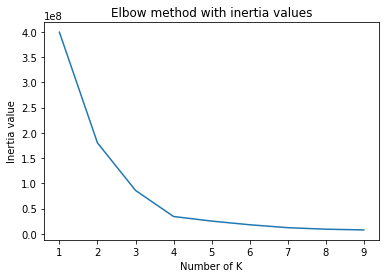

In [32]:
plt.plot(K, inertia_values)
plt.ylabel("Inertia value")
plt.xlabel("Number of K")
plt.title('Elbow method with inertia values')

plt.show

As we see in the elbow plot for inertia values the best k for our model is 4

In [33]:
#create KMeans with optimal k=4 
km_model = KMeans(n_clusters=4)
km_model.fit(X)
y_pred = km_model.predict(X)
customers['predicted_cluster'] = y_pred

In [34]:
customers

,total_sales,ordered_item_quantity,recency,log_total_sales,log_ordered_item_quantity,predicted_cluster
customer_id,,,,,,
1000661,260.0,3,376.0,5.560682,1.098612,0
1001914,79.2,1,376.0,4.371976,0.000000,0
1002167,234.2,3,123.0,5.456175,1.098612,1
1002387,89.0,1,262.0,4.488636,0.000000,3
1002419,103.0,2,186.0,4.634729,0.693147,3
...,...,...,...,...,...,...
97805007741979,259.0,5,257.0,5.556828,1.609438,3
98854671633650,242.5,3,250.0,5.491002,1.098612,3
98974226154136,89.0,1,334.0,4.488636,0.000000,0


Below is a 3D scatterplot of the clusters created by K-means

<bound method Figure.show of <Figure size 720x504 with 1 Axes>>

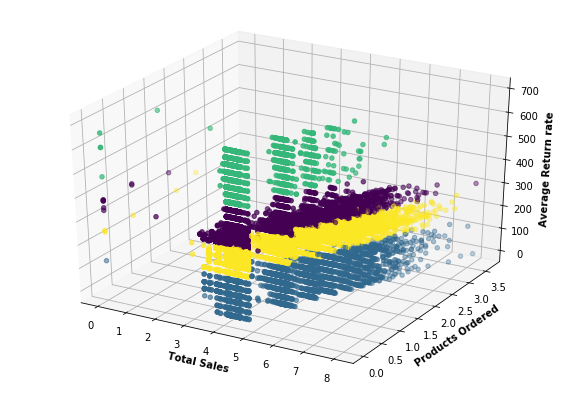

In [35]:
#3d scatter plot of clusters using K-means
from mpl_toolkits import mplot3d
x= X.iloc[:,0] 
y= X.iloc[:,1]
z= X.iloc[:,2]
fig=plt.figure(figsize = (10,7))
ax = plt.axes(projection = "3d")
ax.scatter3D(x, y, z, c= customers['predicted_cluster'])
ax.set_xlabel('Total Sales', fontweight = 'bold')
ax.set_ylabel('Products Ordered', fontweight = 'bold')
ax.set_zlabel('Average Return rate', fontweight = 'bold')
fig.show

# Deployment

In [36]:
#saving our model into pickle
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(km_model, pickle_out) 
pickle_out.close()